<a href="https://colab.research.google.com/github/tanishaad/BeatsbyDre/blob/main/Tanisha_EDA_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
# Data handling
import numpy as np
import pandas as pd

# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# extra
import re

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# sentiment analysis
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R2SSSH04J4J264,B0D4STD5ZC,5.0 out of 5 stars Really nice portable speake...,Bruce C,5,Needed a new portable speaker for the home set...,"Reviewed in the United States July 1, 2024",AFVM53KRAU5JC462ZZDBBKTESPGA,True,11,Color: Statement RedStyle: PillPattern: Withou...
1,R39X7USU3OX34C,B0D4STD5ZC,5.0 out of 5 stars Really good,Justin,5,So I’m super picky about sound and have spent ...,"Reviewed in the United States July 8, 2024",AFSZPNTTLYCLNP536L6VS6UMFTNQ,True,4,Color: Statement RedStyle: PillPattern: Withou...
2,R4BQHA0TLLJNN,B0D4STD5ZC,5.0 out of 5 stars The best Speaker I have eve...,Leox,5,I really like the new Beats Pill 2024 speaker....,"Reviewed in the United States July 11, 2024",AEUCX7EIPTMCFN4OJBZHL2OYSVKQ,True,3,Color: Champagne GoldStyle: PillPattern: Witho...
3,R172ODWJHF6PC5,B0D4STD5ZC,5.0 out of 5 stars Premium portable speaker,John S.,5,My original Wonderboom finally gave up so I bo...,"Reviewed in the United States July 28, 2024",AFJKZEYD2VZSI2NO3JZNMA4XX4RA,True,0,Color: Matte BlackStyle: PillPattern: Without ...
4,R3SO3HMV0YC0WB,B0D4STD5ZC,5.0 out of 5 stars Beats pill,Bryan Pennington,5,"Great product, also very sturdy it survived a ...","Reviewed in the United States August 6, 2024",AH6XBZHLROVWE5R25OTBLS2F4CEQ,True,0,Color: Champagne GoldStyle: PillPattern: Witho...


In [4]:
df.columns

Index(['review_id', 'product_id', 'title', 'author', 'rating', 'content',
       'timestamp', 'profile_id', 'is_verified', 'helpful_count',
       'product_attributes'],
      dtype='object')

In [5]:
df.drop('profile_id', axis=1, inplace=True)
df.columns

Index(['review_id', 'product_id', 'title', 'author', 'rating', 'content',
       'timestamp', 'is_verified', 'helpful_count', 'product_attributes'],
      dtype='object')

In [6]:
false_count = (df['is_verified'] == False).sum()
print(false_count)

df = df[df['is_verified'] == True]
df.drop('is_verified', axis=1, inplace=True)
df

39


,review_id,product_id,title,author,rating,content,timestamp,helpful_count,product_attributes
0,R2SSSH04J4J264,B0D4STD5ZC,5.0 out of 5 stars Really nice portable speake...,Bruce C,5,Needed a new portable speaker for the home set...,"Reviewed in the United States July 1, 2024",11,Color: Statement RedStyle: PillPattern: Withou...
1,R39X7USU3OX34C,B0D4STD5ZC,5.0 out of 5 stars Really good,Justin,5,So I’m super picky about sound and have spent ...,"Reviewed in the United States July 8, 2024",4,Color: Statement RedStyle: PillPattern: Withou...
2,R4BQHA0TLLJNN,B0D4STD5ZC,5.0 out of 5 stars The best Speaker I have eve...,Leox,5,I really like the new Beats Pill 2024 speaker....,"Reviewed in the United States July 11, 2024",3,Color: Champagne GoldStyle: PillPattern: Witho...
3,R172ODWJHF6PC5,B0D4STD5ZC,5.0 out of 5 stars Premium portable speaker,John S.,5,My original Wonderboom finally gave up so I bo...,"Reviewed in the United States July 28, 2024",0,Color: Matte BlackStyle: PillPattern: Without ...
4,R3SO3HMV0YC0WB,B0D4STD5ZC,5.0 out of 5 stars Beats pill,Bryan Pennington,5,"Great product, also very sturdy it survived a ...","Reviewed in the United States August 6, 2024",0,Color: Champagne GoldStyle: PillPattern: Witho...
...,...,...,...,...,...,...,...,...,...
1021,RGV7Y77KCH4HF,B07P39MLKH,4.0 out of 5 stars Physics cannot be cheated; ...,Frank Doghearty,4,(08/10/2020) After several months of satisfact...,"Reviewed in the United States December 24, 2019",13,Color: Black
1022,R20MPMFGI8AOVG,B07P39MLKH,5.0 out of 5 stars Not what I expected - retur...,eimajine,5,I wrote the following review and Soundcore's c...,"Reviewed in the United States January 22, 2024",1,Color: Black
1023,RE3FKZQVCJGRW,B07P39MLKH,4.0 out of 5 stars Bueno pero no tan bueno!,Juan Carlos,4,Hola a todosEl día de hoy adquirí la bocina so...,"Reviewed in the United States October 26, 2021",0,Color: Black
1024,RT0JXSY1JD7VV,B07P39MLKH,"5.0 out of 5 stars If you can, buy two motion+...",Beatrice C.,5,I originally purchased one red motion+ like 2 ...,"Reviewed in the United States March 3, 2024",0,Color: Black


In [7]:
df['rating'].describe()

,rating
count,987.000000
mean,4.596758
std,0.877664
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [8]:
unique_product_ids = df['product_id'].unique()
print(unique_product_ids)

['B0D4STD5ZC' 'B099TLMRB6' 'B0CXL4FQBK' 'B09GJMPRYW' 'B08Z1RP9K8'
 'B0B25H1NYH' 'B08X4YMTPM' 'B0BWXM3RRK' 'B07DD3VXRZ' 'B086M39RJS'
 'B07P39MLKH']


In [9]:
product_mapping = {
    'B0D4STD5ZC': 'beats Pill',
    'B099TLMRB6': 'Bose SoundLink Flex',
    'B0CXL4FQBK': 'Sony ULT Field 1',
    'B09GJMPRYW': 'JBL Flip 6',
    'B08Z1RP9K8': 'Sonos Roam',
    'B0B25H1NYH': 'Marshall Emberton II',
    'B08X4YMTPM': 'JBL CHARGE 5',
    'B0BWXM3RRK': 'Soundcore Motion X600',
    'B07DD3VXRZ': 'Ultimate Ears Boom 3',
    'B086M39RJS': 'LG XBOOM Go PL5',
    'B07P39MLKH': 'Soundcore Motion+',
}

product_prices = {
    'B0D4STD5ZC': '149.99',
    'B099TLMRB6': '149.00',
    'B0CXL4FQBK': '129.99',
    'B09GJMPRYW': '129.99',
    'B08Z1RP9K8': '179.00',
    'B0B25H1NYH': '179.99',
    'B08X4YMTPM': '179.95',
    'B0BWXM3RRK': '199.99',
    'B07DD3VXRZ': '149.99',
    'B086M39RJS': '99.99',
    'B07P39MLKH': '99.99',
}

df['product_name'] = df['product_id'].map(product_mapping)
df['price'] = df['product_id'].map(product_prices)
df['price'] = pd.to_numeric(df['price'])

In [10]:
df

,review_id,product_id,title,author,rating,content,timestamp,helpful_count,product_attributes,product_name,price
0,R2SSSH04J4J264,B0D4STD5ZC,5.0 out of 5 stars Really nice portable speake...,Bruce C,5,Needed a new portable speaker for the home set...,"Reviewed in the United States July 1, 2024",11,Color: Statement RedStyle: PillPattern: Withou...,beats Pill,149.99
1,R39X7USU3OX34C,B0D4STD5ZC,5.0 out of 5 stars Really good,Justin,5,So I’m super picky about sound and have spent ...,"Reviewed in the United States July 8, 2024",4,Color: Statement RedStyle: PillPattern: Withou...,beats Pill,149.99
2,R4BQHA0TLLJNN,B0D4STD5ZC,5.0 out of 5 stars The best Speaker I have eve...,Leox,5,I really like the new Beats Pill 2024 speaker....,"Reviewed in the United States July 11, 2024",3,Color: Champagne GoldStyle: PillPattern: Witho...,beats Pill,149.99
3,R172ODWJHF6PC5,B0D4STD5ZC,5.0 out of 5 stars Premium portable speaker,John S.,5,My original Wonderboom finally gave up so I bo...,"Reviewed in the United States July 28, 2024",0,Color: Matte BlackStyle: PillPattern: Without ...,beats Pill,149.99
4,R3SO3HMV0YC0WB,B0D4STD5ZC,5.0 out of 5 stars Beats pill,Bryan Pennington,5,"Great product, also very sturdy it survived a ...","Reviewed in the United States August 6, 2024",0,Color: Champagne GoldStyle: PillPattern: Witho...,beats Pill,149.99
...,...,...,...,...,...,...,...,...,...,...,...
1021,RGV7Y77KCH4HF,B07P39MLKH,4.0 out of 5 stars Physics cannot be cheated; ...,Frank Doghearty,4,(08/10/2020) After several months of satisfact...,"Reviewed in the United States December 24, 2019",13,Color: Black,Soundcore Motion+,99.99
1022,R20MPMFGI8AOVG,B07P39MLKH,5.0 out of 5 stars Not what I expected - retur...,eimajine,5,I wrote the following review and Soundcore's c...,"Reviewed in the United States January 22, 2024",1,Color: Black,Soundcore Motion+,99.99
1023,RE3FKZQVCJGRW,B07P39MLKH,4.0 out of 5 stars Bueno pero no tan bueno!,Juan Carlos,4,Hola a todosEl día de hoy adquirí la bocina so...,"Reviewed in the United States October 26, 2021",0,Color: Black,Soundcore Motion+,99.99
1024,RT0JXSY1JD7VV,B07P39MLKH,"5.0 out of 5 stars If you can, buy two motion+...",Beatrice C.,5,I originally purchased one red motion+ like 2 ...,"Reviewed in the United States March 3, 2024",0,Color: Black,Soundcore Motion+,99.99


In [11]:
grouped_stats = df.groupby('product_name')['rating'].agg(['mean', 'std']).reset_index()
grouped_stats

,product_name,mean,std
0,Bose SoundLink Flex,4.860000,0.376588
1,JBL CHARGE 5,4.900000,0.362372
2,JBL Flip 6,4.888889,0.315869
3,LG XBOOM Go PL5,4.750000,0.609272
4,Marshall Emberton II,4.760000,0.494822
5,Sonos Roam,3.500000,1.560238
6,Sony ULT Field 1,4.662791,0.834696
7,Soundcore Motion X600,4.750000,0.500000
8,Soundcore Motion+,4.671429,0.557464
9,Ultimate Ears Boom 3,4.300000,1.039619


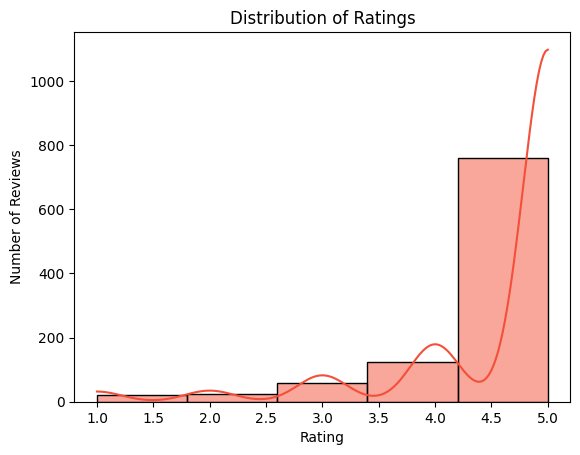

In [12]:
sns.histplot(df['rating'], bins=5, kde=True, color=sns.color_palette("Reds")[3])
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

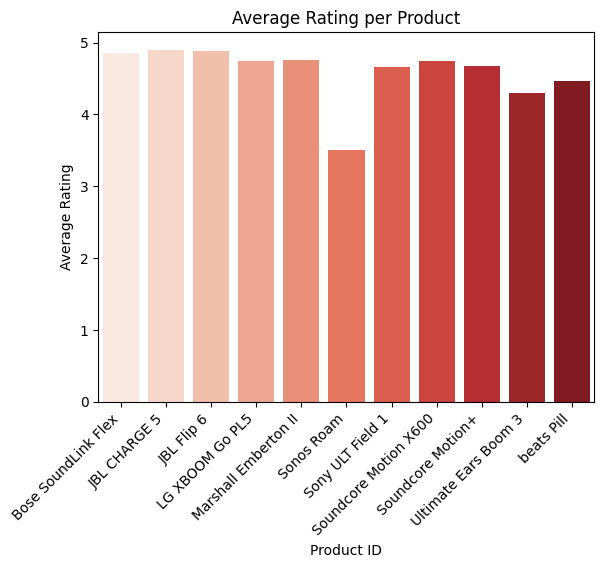

In [13]:
# Calculate mean rating per product
mean_ratings = df.groupby('product_name')['rating'].mean().reset_index()

# Bar plot of average ratings per product
sns.barplot(x='product_name', y='rating', data=mean_ratings, palette='Reds')
plt.xticks(rotation=45, ha='right')
plt.title('Average Rating per Product')
plt.xlabel('Product ID')
plt.ylabel('Average Rating')
plt.show()

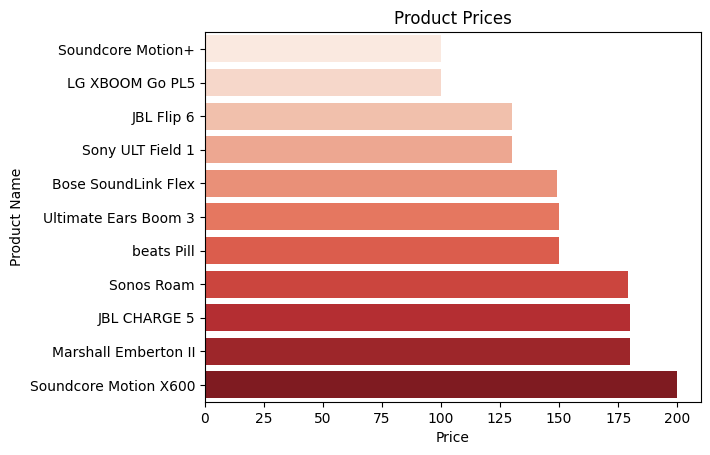

In [14]:
df_sorted = df.sort_values(by='price', ascending=True)

# boxplot of product prices
sns.barplot(x='price', y='product_name', data=df_sorted, palette='Reds')

plt.title('Product Prices')
plt.xlabel('Price')
plt.ylabel('Product Name')

plt.show()

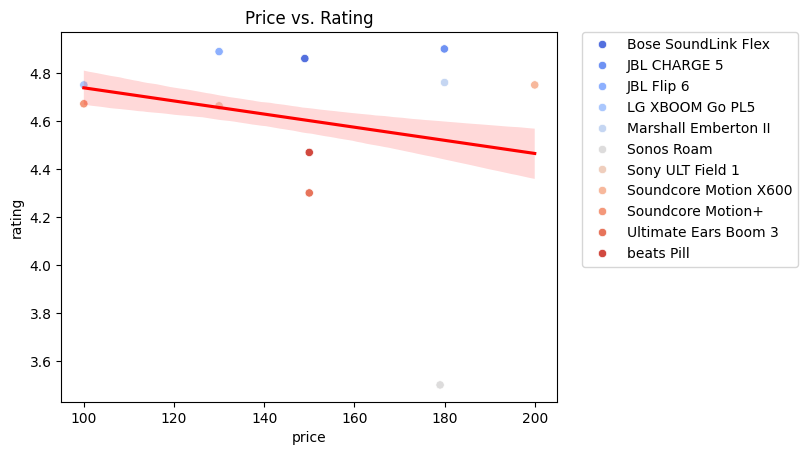

In [15]:
# Calculate the average rating per product and its price
avg_rating_price = df.groupby('product_name').agg({'rating': 'mean', 'price': 'first'}).reset_index()

# Scatter plot of price vs. average rating
sns.scatterplot(x='price', y='rating', data=avg_rating_price, hue='product_name', palette='coolwarm')
plt.title('Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
sns.regplot(x='price', y='rating', data=df, scatter=False, color='red')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

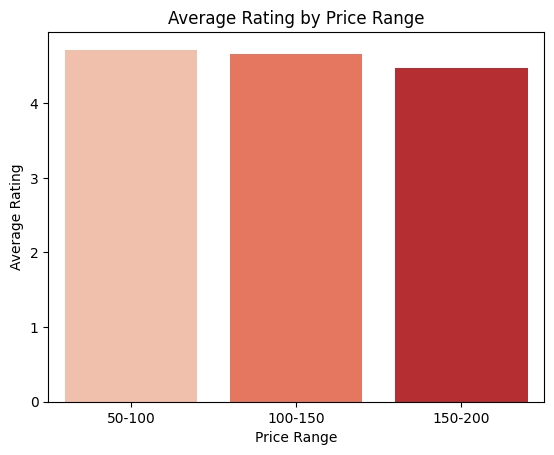

In [16]:
# Define price ranges
bins = [50, 100, 150, 200]
labels = ['50-100', '100-150', '150-200']
df['price_range'] = pd.cut(df['price'], bins=bins, labels=labels)

# Calculate average rating per price range
avg_rating_by_price_range = df.groupby('price_range')['rating'].mean().reset_index()

# Bar plot of average rating by price range
sns.barplot(x='price_range', y='rating', data=avg_rating_by_price_range, palette='Reds')
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.show()

count     987.000000
mean      523.785208
std       882.629333
min         1.000000
25%        90.000000
50%       211.000000
75%       517.500000
max      7333.000000
Name: content_length, dtype: float64


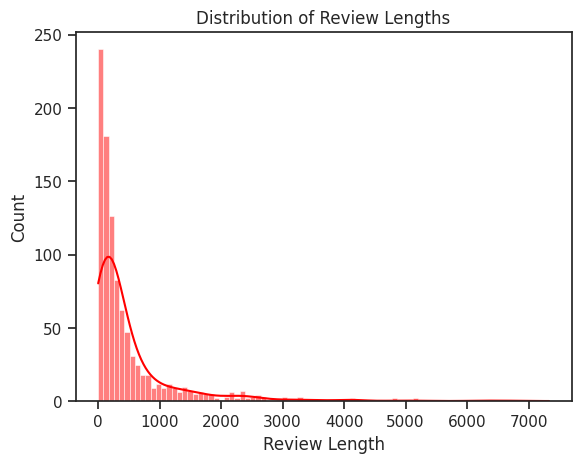

In [17]:
sns.set_theme(style="ticks")

df['content_length'] = df['content'].apply(len)
print(df['content_length'].describe())
sns.histplot(df['content_length'], kde=True, color='red')
plt.xlabel('Review Length')
plt.title('Distribution of Review Lengths')
plt.show()

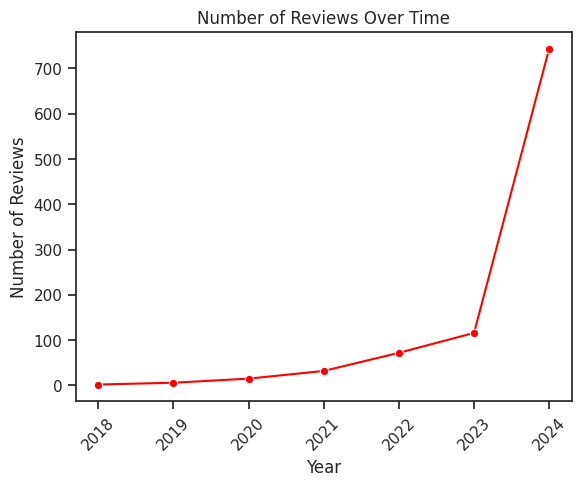

In [18]:
def extract_date(text):
    match = re.search(r"([A-Za-z]+ \d{1,2}, \d{4})", text)
    if match:
        return match.group(1)
    else:
        return None

# change values in timestamp column to year-month-date format only
df['timestamp'] = df['timestamp'].apply(extract_date)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# time series analysis
df['year'] = df['timestamp'].dt.to_period('Y')
yearly_reviews = df.groupby('year').size().reset_index(name='review_count')
yearly_reviews['year'] = yearly_reviews['year'].astype(str)

plt.figure()
sns.lineplot(x='year', y='review_count', data=yearly_reviews, marker='o', color='red')
plt.title('Number of Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

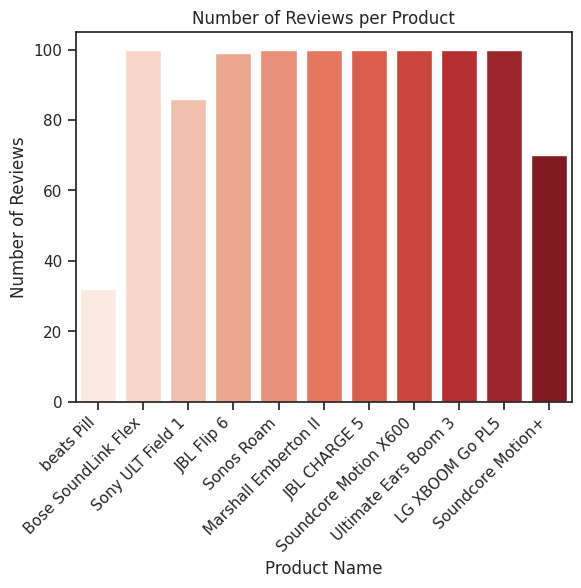

In [19]:
sns.countplot(x='product_name', data=df, palette='Reds')
plt.title('Number of Reviews per Product')
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()

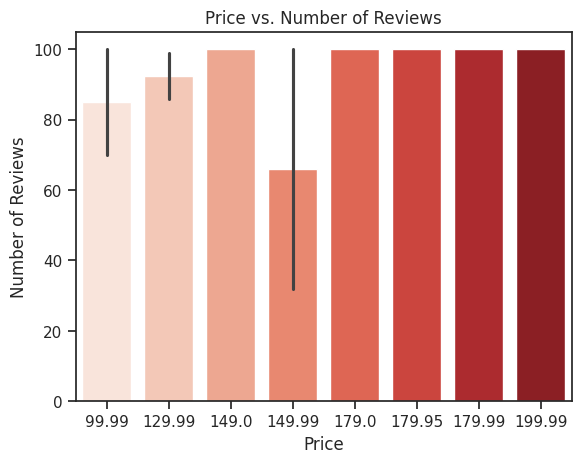

In [20]:
# Calculate review count per product and its price
review_count_price = df.groupby('product_id').agg({'review_id': 'count', 'price': 'first'}).reset_index()

# Bar plot of price vs. review count
sns.barplot(x='price', y='review_id', data=review_count_price, palette='Reds')
plt.title('Price vs. Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.show()

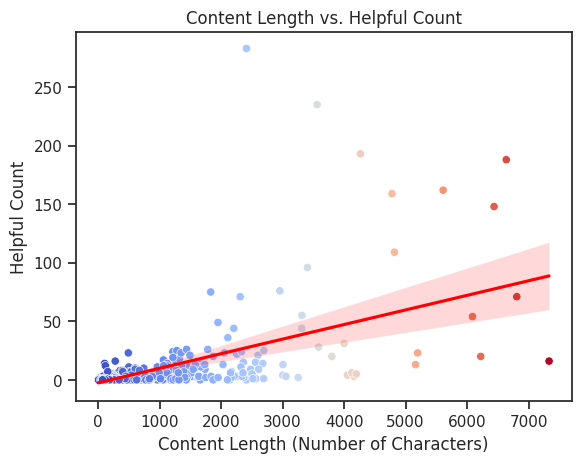

In [21]:
# Scatter plot with regression line for content length vs. helpful count
sns.scatterplot(x='content_length', y='helpful_count', data=df, hue='content_length', palette='coolwarm', legend=False)
sns.regplot(x='content_length', y='helpful_count', data=df, scatter=False, color='red')

plt.title('Content Length vs. Helpful Count')
plt.xlabel('Content Length (Number of Characters)')
plt.ylabel('Helpful Count')
plt.show()

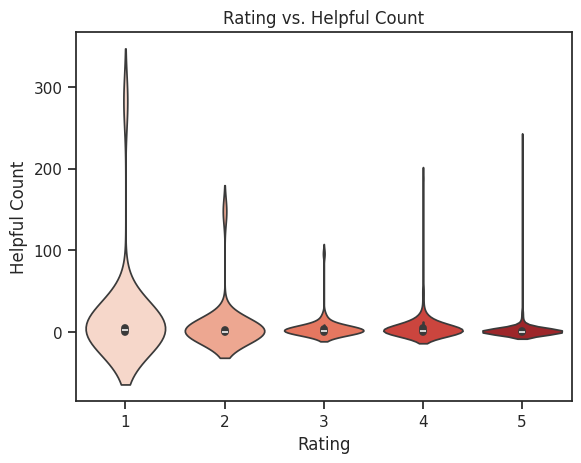

In [22]:
# Violin plot for rating vs. helpful count
sns.violinplot(x='rating', y='helpful_count', data=df, palette='Reds')

plt.title('Rating vs. Helpful Count')
plt.xlabel('Rating')
plt.ylabel('Helpful Count')
plt.show()

In [23]:
df.columns

Index(['review_id', 'product_id', 'title', 'author', 'rating', 'content',
       'timestamp', 'helpful_count', 'product_attributes', 'product_name',
       'price', 'price_range', 'content_length', 'year'],
      dtype='object')

In [24]:
numerical_columns = ['rating', 'helpful_count', 'price', 'content_length']
covariance_matrix = df[numerical_columns].cov()
print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
                   rating  helpful_count        price  content_length
rating           0.770294      -1.753993    -2.802088      -98.394003
helpful_count   -1.753993     347.017851     8.682019     9704.459757
price           -2.802088       8.682019  1024.775803    -2425.826077
content_length -98.394003    9704.459757 -2425.826077   779034.540024


In [25]:
correlation_matrix = df[numerical_columns].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                  rating  helpful_count     price  content_length
rating          1.000000      -0.107281 -0.099733       -0.127017
helpful_count  -0.107281       1.000000  0.014559        0.590224
price          -0.099733       0.014559  1.000000       -0.085855
content_length -0.127017       0.590224 -0.085855        1.000000


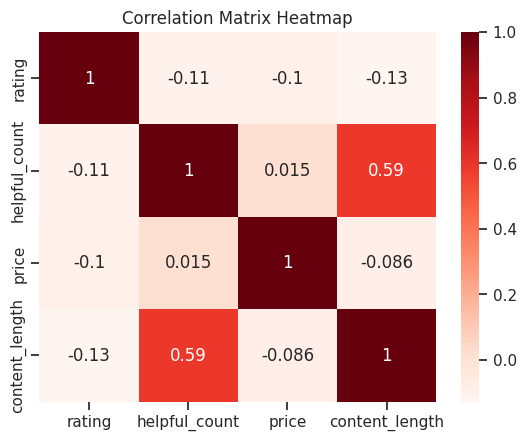

In [26]:
# Plot a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='Reds')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [27]:
def sentiment_analysis_summary(df, text_col):
    """
    Perform sentiment analysis on text data and return the counts of positive, negative, and neutral reviews.

    Parameters:
    df (DataFrame): The input DataFrame.
    text_col (str): The name of the column containing text data.

    Returns:
    dict: A dictionary with counts of positive, negative, and neutral reviews.
    """
    positive_count = 0
    negative_count = 0
    neutral_count = 0

    for text in df[text_col].dropna():

        blob = TextBlob(text)
        polarity = blob.sentiment.polarity

        if polarity > 0:
            positive_count += 1
        elif polarity < 0:
            negative_count += 1
        else:
            neutral_count += 1

    return {
        'positive': positive_count,
        'negative': negative_count,
        'neutral': neutral_count
    }

sentiment_summary = sentiment_analysis_summary(df, 'content')
print(sentiment_summary)

{'positive': 857, 'negative': 34, 'neutral': 96}


In [72]:
# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to the 'content' column
df['sentiment_polarity'] = df['content'].apply(get_sentiment)

# Function to classify sentiment based on polarity
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the classification function to the sentiment polarity column
df['sentiment_category'] = df['sentiment_polarity'].apply(classify_sentiment)

# Display the DataFrame with sentiment polarity
df.head()

,review_id,product_id,title,author,rating,content,timestamp,helpful_count,product_attributes,product_name,price,price_range,content_length,year,sentiment_polarity,sentiment_category
0,R2SSSH04J4J264,B0D4STD5ZC,5.0 out of 5 stars Really nice portable speake...,Bruce C,5,Needed a new portable speaker for the home set...,2024-07-01,11,Color: Statement RedStyle: PillPattern: Withou...,beats Pill,149.99,100-150,1505,2024,0.341186,Positive
1,R39X7USU3OX34C,B0D4STD5ZC,5.0 out of 5 stars Really good,Justin,5,So I’m super picky about sound and have spent ...,2024-07-08,4,Color: Statement RedStyle: PillPattern: Withou...,beats Pill,149.99,100-150,756,2024,0.290789,Positive
2,R4BQHA0TLLJNN,B0D4STD5ZC,5.0 out of 5 stars The best Speaker I have eve...,Leox,5,I really like the new Beats Pill 2024 speaker....,2024-07-11,3,Color: Champagne GoldStyle: PillPattern: Witho...,beats Pill,149.99,100-150,621,2024,0.307318,Positive
3,R172ODWJHF6PC5,B0D4STD5ZC,5.0 out of 5 stars Premium portable speaker,John S.,5,My original Wonderboom finally gave up so I bo...,2024-07-28,0,Color: Matte BlackStyle: PillPattern: Without ...,beats Pill,149.99,100-150,276,2024,0.254375,Positive
4,R3SO3HMV0YC0WB,B0D4STD5ZC,5.0 out of 5 stars Beats pill,Bryan Pennington,5,"Great product, also very sturdy it survived a ...",2024-08-06,0,Color: Champagne GoldStyle: PillPattern: Witho...,beats Pill,149.99,100-150,141,2024,0.223214,Positive


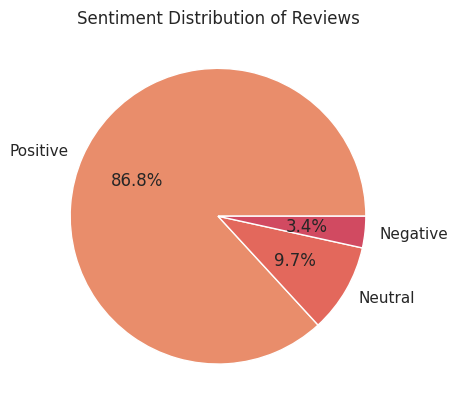

In [73]:
# Calculate the sentiment distribution
sentiment_counts = df['sentiment_category'].value_counts()

# Plot a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('flare'))
plt.title('Sentiment Distribution of Reviews')
plt.show()

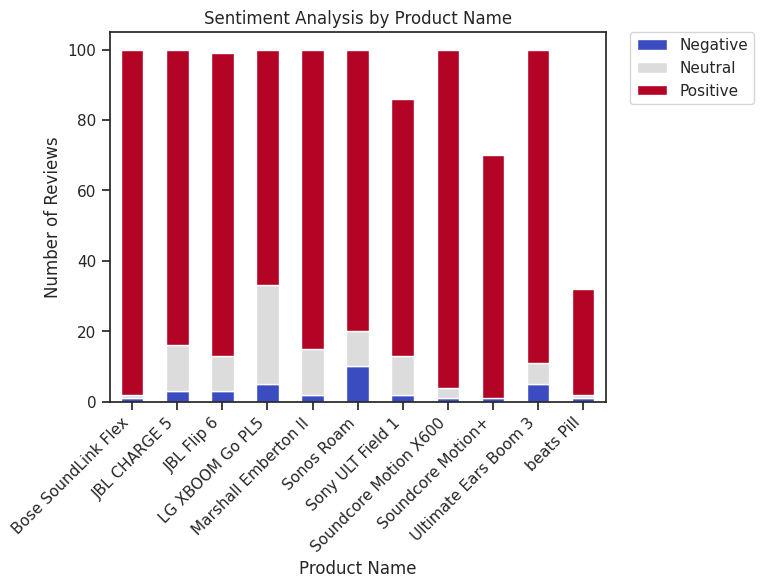

In [104]:
sentiment_crosstab = pd.crosstab(df['product_name'], df['sentiment_category'])

sentiment_crosstab.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Sentiment Analysis by Product Name')
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45, ha='right')
plt.show()

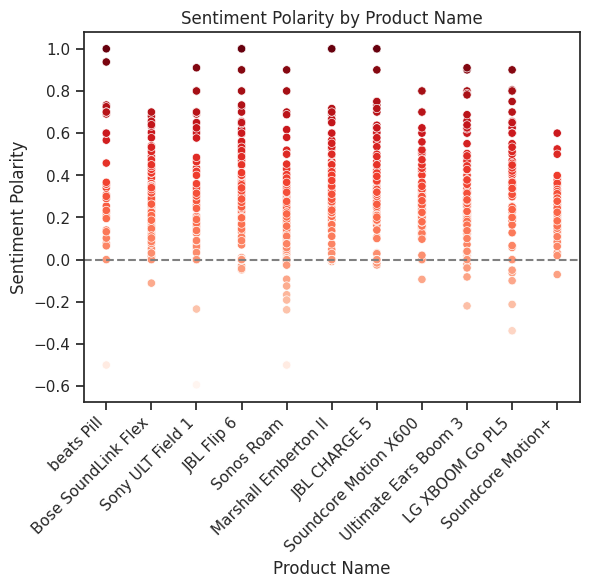

In [78]:
sentiment_crosstab = pd.crosstab(df['product_name'], df['sentiment_category'])
sns.scatterplot(x='product_name', y='sentiment_polarity', data=df, hue='sentiment_polarity', palette='Reds', legend=False)

plt.title('Sentiment Polarity by Product Name')
plt.xlabel('Product Name')
plt.ylabel('Sentiment Polarity')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='grey', linestyle='--')  # Optional: Add a horizontal line at 0 to differentiate positive/negative
plt.show()